<h1 style="text-align: center;">ETL y EDA con Python</h1>
<h1 style="text-align: center;">Portfolio Marco Riquelme</h1>
<h3 style="text-align: center;">DEMANDA Y GENERACIÓN DE ENERGÍA ELECTRICA EN TWH DE SUDAMERICA</h3>

# ETL - adecuación de la estructura de la tabla

## Importamos la librería de trabajo

In [1]:
## Instalación de la librería sqlalchemy pyodbc  quitar el signo # para instalar la libreria
#!pip install sqlalchemy pyodbc
#!pip install --upgrade openpyxl
!pip install --upgrade openpyxl==3.1.0

In [2]:
#!pip install --upgrade openpyxl
!pip show openpyxl

Name: openpyxl
Version: 3.1.0
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Anaconda3\Lib\site-packages
Requires: et-xmlfile
Required-by: 


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy   as np
import pyodbc  as db

## Conectamos y mostramos el DataFrame

In [35]:
ruta_csv = 'c:/Analista de datos/Portafolio/Global Electricity Demand and Generation.csv'
df_csv = pd.read_csv (ruta_csv, sep=';', encoding='UTF-8')
df_csv.head()

#ruta_excel = 'c:/Analista de datos/Portafolio/Respaldo XLS/Global Electricity Demand and Generation.xlsx'
#Hoja = 'Global'
#df_excel = pd.read_excel(ruta_excel, sheet_name=Hoja)
#df_excel.head ()


,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,Venezuela,VEN,2010,11078,11078
1,Venezuela,VEN,2015,11823,1192
2,Venezuela,VEN,2020,9359,9424
3,Uruguay,URY,2010,1072,1104
4,Uruguay,URY,2015,1229,1361


In [36]:
df_csv.columns


Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh',
       'Electricity generation - TWh'],
      dtype='object')

In [39]:
Columnas = ['Entity' , 'Code' , 'Year' , 'Electricity demand - TWh' , 'Electricity generation - TWh']
#df_csv[Columnas].head()
df_csv = df_csv[Columnas].copy()

In [41]:

df_csv['Nueva columna']=np.where( df_csv['Electricity demand - TWh']>5000,'alta', 'baja')
df_csv.head()

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh,Nueva columna
0,Venezuela,VEN,2010,11078,11078,alta
1,Venezuela,VEN,2015,11823,1192,alta
2,Venezuela,VEN,2020,9359,9424,alta
3,Uruguay,URY,2010,1072,1104,baja
4,Uruguay,URY,2015,1229,1361,baja


## Empezamos con el proceso ETL

In [42]:
#Creamos una lista de columnas para utilizarlas en nuestro bucle
df_csv.columns

Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh',
       'Electricity generation - TWh', 'Nueva columna'],
      dtype='object')

In [65]:

#Mostramos el DataFrame

#df_t
df_csv.head(36)

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh,Nueva columna
0,Venezuela,VEN,2010,11078,11078,alta
1,Venezuela,VEN,2015,11823,1192,alta
2,Venezuela,VEN,2020,9359,9424,alta
3,Uruguay,URY,2010,1072,1104,baja
4,Uruguay,URY,2015,1229,1361,baja
5,Uruguay,URY,2020,1291,1354,baja
6,Peru,PER,2010,3417,3428,baja
7,Peru,PER,2015,462,4625,baja
8,Peru,PER,2020,5286,5282,alta
9,Peru,PER,2022,6031,6027,alta


In [10]:
# Se exporta a un excel, con el código anterior se puede armar un scritp para automatizar la transformación
# df_final.to_excel("datos_inmuebles.xlsx", index=False)

# EDA Análisis exploratorio

In [44]:

# Verificar la conversión
df_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Entity                        36 non-null     object
 1   Code                          36 non-null     object
 2   Year                          36 non-null     int64 
 3   Electricity demand - TWh      36 non-null     int64 
 4   Electricity generation - TWh  36 non-null     int64 
 5   Nueva columna                 36 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


In [45]:
df_csv.describe()

,Year,Electricity demand - TWh,Electricity generation - TWh
count,36.000000,36.000000,36.000000
mean,2016.166667,11878.055556,11254.305556
std,4.613644,18762.643778,17810.027641
min,2010.000000,185.000000,465.000000
25%,2010.000000,1203.500000,1380.500000
50%,2015.000000,5976.500000,5598.000000
75%,2020.000000,11264.250000,8695.000000
max,2022.000000,70399.000000,68089.000000


In [47]:
df_csv.shape

(36, 6)

In [48]:
df_csv.select_dtypes('object')

,Entity,Code,Nueva columna
0,Venezuela,VEN,alta
1,Venezuela,VEN,alta
2,Venezuela,VEN,alta
3,Uruguay,URY,baja
4,Uruguay,URY,baja
5,Uruguay,URY,baja
6,Peru,PER,baja
7,Peru,PER,baja
8,Peru,PER,alta
9,Peru,PER,alta


In [49]:
df_csv.select_dtypes('int64')

,Year,Electricity demand - TWh,Electricity generation - TWh
0,2010,11078,11078
1,2015,11823,1192
2,2020,9359,9424
3,2010,1072,1104
4,2015,1229,1361
5,2020,1291,1354
6,2010,3417,3428
7,2015,462,4625
8,2020,5286,5282
9,2022,6031,6027


In [50]:
#muestra una suma de los campos que tienen nulo
df_csv.isna().sum()

Entity                          0
Code                            0
Year                            0
Electricity demand - TWh        0
Electricity generation - TWh    0
Nueva columna                   0
dtype: int64

In [51]:
#imprime las paises unicos de la tabla
print (df_csv['Entity'].unique())

['Venezuela' 'Uruguay' 'Peru' 'Paraguay' 'Ecuador' 'Colombia' 'Chile'
 'Brazil' 'Bolivia' 'Argentina']


In [52]:
#Conteo de valores únicos
df_csv['Entity'].value_counts()

Entity
Peru         4
Colombia     4
Chile        4
Brazil       4
Bolivia      4
Argentina    4
Venezuela    3
Uruguay      3
Paraguay     3
Ecuador      3
Name: count, dtype: int64

In [53]:
# Muestra el porcentaje de países respecto al total
df_csv['Entity'].value_counts('%') * 100

Entity
Peru         11.111111
Colombia     11.111111
Chile        11.111111
Brazil       11.111111
Bolivia      11.111111
Argentina    11.111111
Venezuela     8.333333
Uruguay       8.333333
Paraguay      8.333333
Ecuador       8.333333
Name: proportion, dtype: float64

In [29]:
suma_uf_por_foja = df_csv.groupby('Entity')['Year'].sum().sort_values(ascending=False)
#print(suma_uf_por_comuna)
df_csv.head(108)

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,Venezuela,VEN,2010,11078,11078
1,Venezuela,VEN,2015,11823,1192
2,Venezuela,VEN,2020,9359,9424
3,Uruguay,URY,2010,1072,1104
4,Uruguay,URY,2015,1229,1361
5,Uruguay,URY,2020,1291,1354
6,Peru,PER,2010,3417,3428
7,Peru,PER,2015,462,4625
8,Peru,PER,2020,5286,5282
9,Peru,PER,2022,6031,6027


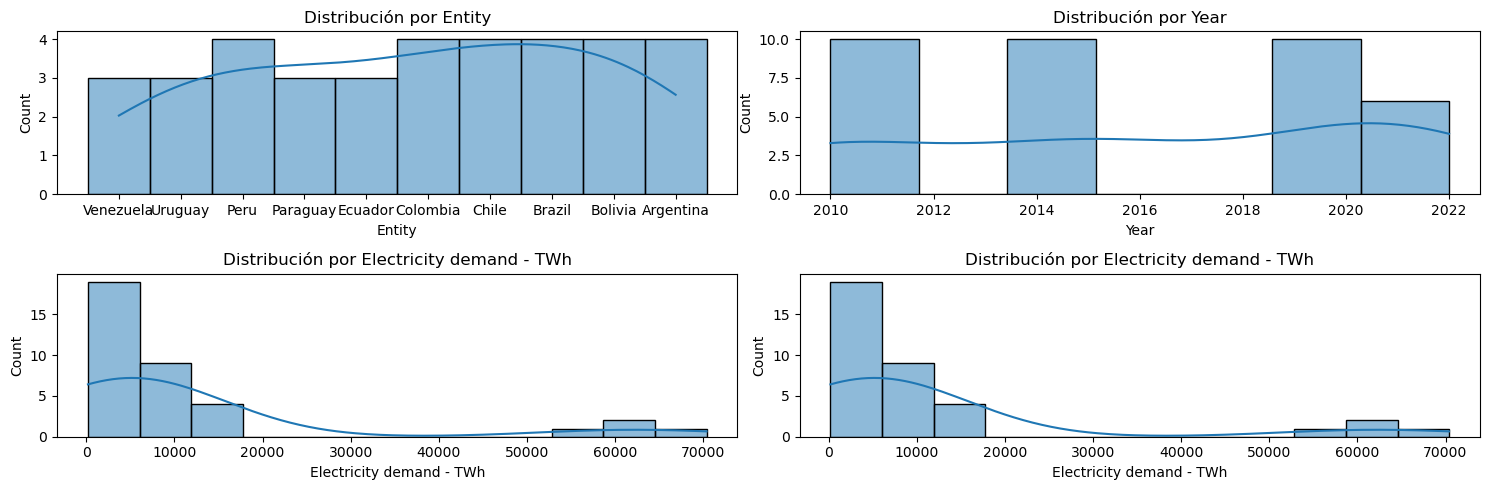

In [63]:
#df_t = df_t.replace ([np.inf -np.inf] , np.nan)
import warnings
warnings.filterwarnings("ignore")
plt.figure (figsize=(15,5))
listado = ['Entity',	'Year',	'Electricity demand - TWh',	'Electricity demand - TWh']
for i, col in enumerate(listado):
    plt.subplot(2, 2 , i + 1)
    data_sin_nan = df_csv[col].dropna()
    sns.histplot(data_sin_nan, kde=True)
    plt.title(f'Distribución por {col}')

    # eliminar valores NaN antes de hacer el histograma
    #data_sin_nan = df[col].dropna()
    #sns.histplot(data_sin_nan, kde=True)
    #plt.title(f'Distribución de {col}')
    
plt.tight_layout()
plt.show()   

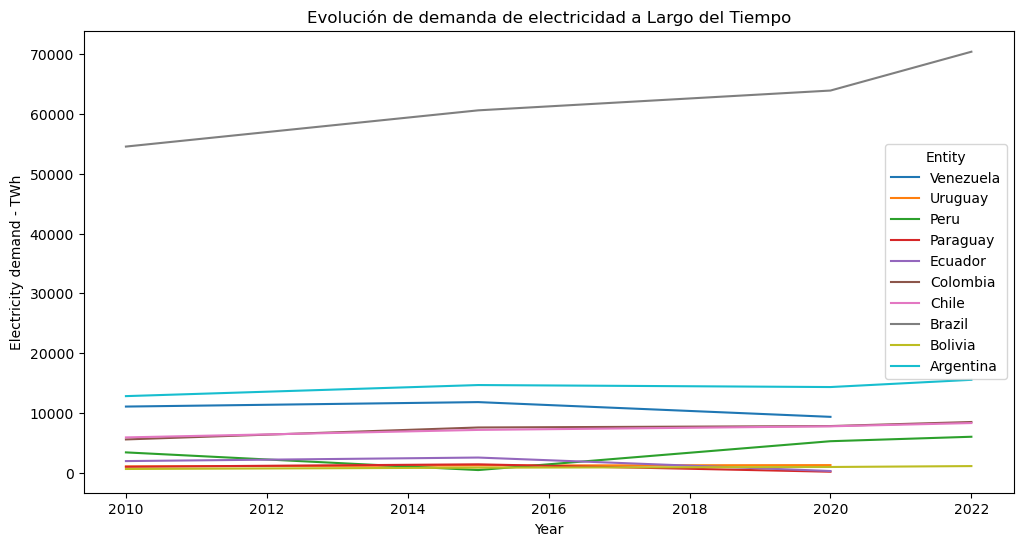

In [64]:
# Evolución de las Ventas a lo Largo del Tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Electricity demand - TWh', hue='Entity', data=df_csv)
plt.title('Evolución de demanda de electricidad a Largo del Tiempo')
plt.show()

# Conclusion

Se observa un aumento de la demanda de energía con el correr de los años, asi, como también en la generación de ella




Resumen del EDA

1. Existen en la tabla un total de 108 filas de países con sus consumos de demanda y generación de Energía en una muestra de año con 4 columnas de las cuales 6 países aparecen 12 veces y el resto de los 4 países aparecen en 9 oportunidades. Se puede visualizar que la muestra de datos no tiene nulos, por lo que la información se encuentra correctamente limpia.
2. Otro dato es que el porcentaje de países respecto al total es el siguiente.
   
 País
Peru         11.111111
Colombia     11.111111
Chile        11.111111
Brazil       11.111111
Bolivia      11.111111
Argentina    11.111111
Venezuela     8.333333
Uruguay       8.333333
Paraguay      8.333333
   



3.


  8.333333